<a href="https://colab.research.google.com/github/DolevSeren/DI-Bootcamp/blob/main/Predicting%20Heart%20Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [3]:
df.nunique()

,0
id,920
age,50
sex,2
dataset,4
cp,4
trestbps,61
chol,217
fbs,2
restecg,3
thalch,119


In [4]:
for feature in df.columns:
  if df[feature].nunique() < 10:
    print(feature, df[feature].unique())

sex ['Male' 'Female']
dataset ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
cp ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
fbs [True False nan]
restecg ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
exang [False True nan]
slope ['downsloping' 'flat' 'upsloping' nan]
ca [ 0.  3.  2.  1. nan]
thal ['fixed defect' 'normal' 'reversable defect' nan]
num [0 2 1 3 4]


In [5]:
#df = df.drop(['id'], axis=1)

categorical = df.columns[df.nunique() < 50]
numeric = df.select_dtypes(include=[int, float]).columns[df.select_dtypes(include=[int, float]).nunique() >= 50]

print('categorical', categorical)
print('numeric', numeric)

categorical Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca',
       'thal', 'num'],
      dtype='object')
numeric Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak'], dtype='object')


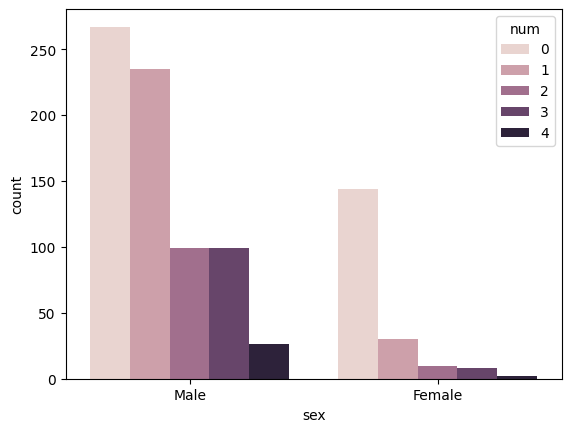

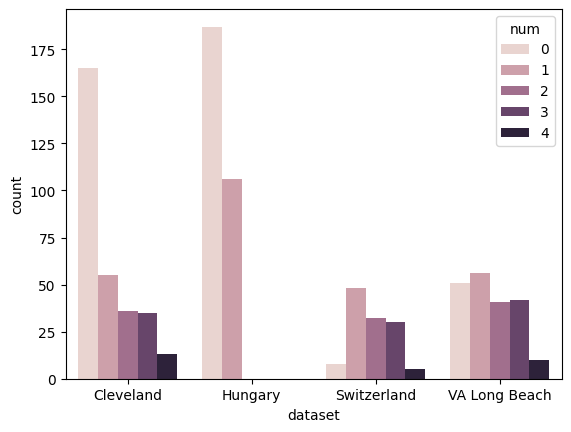

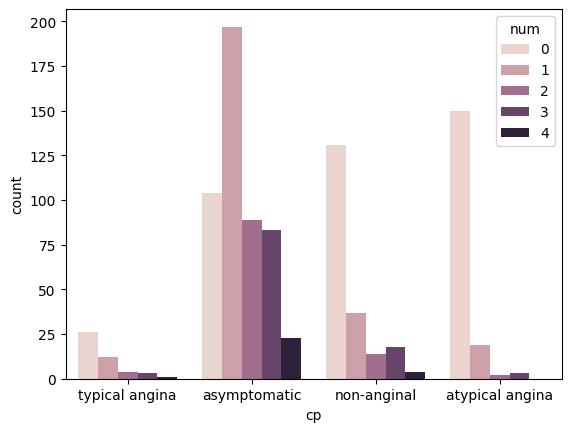

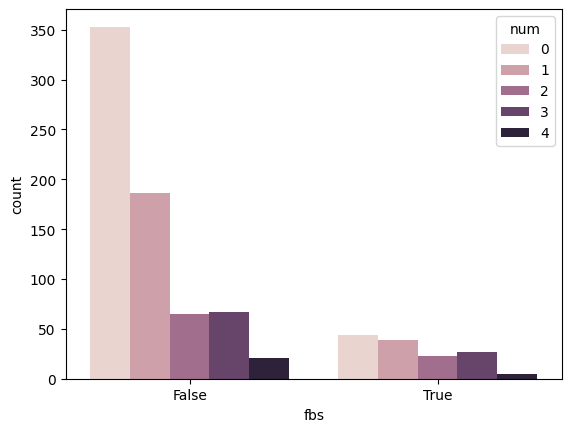

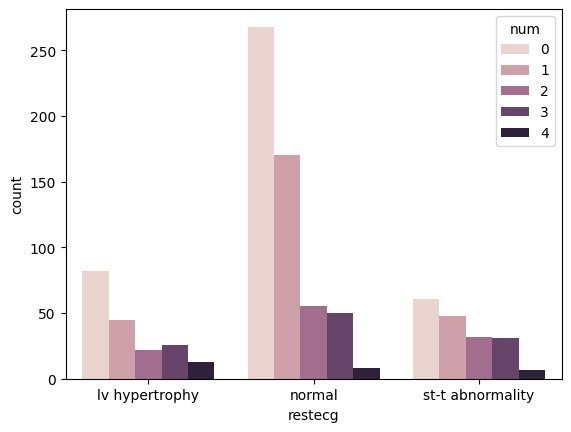

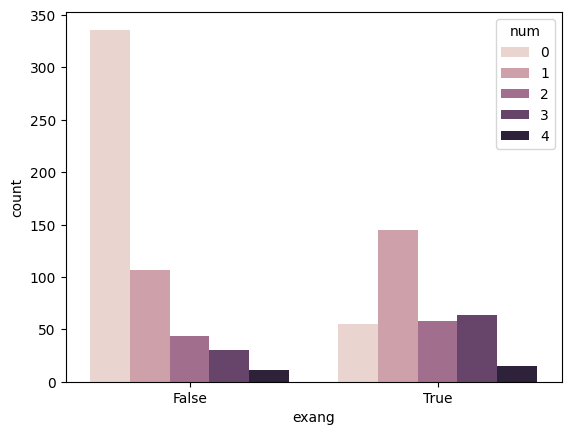

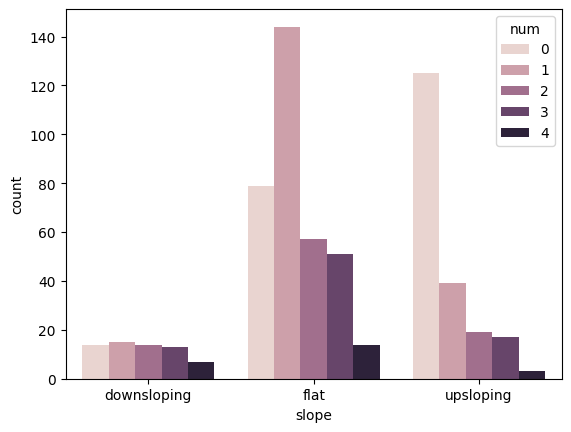

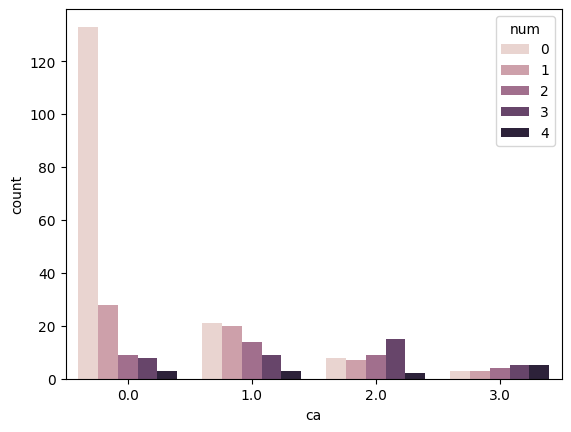

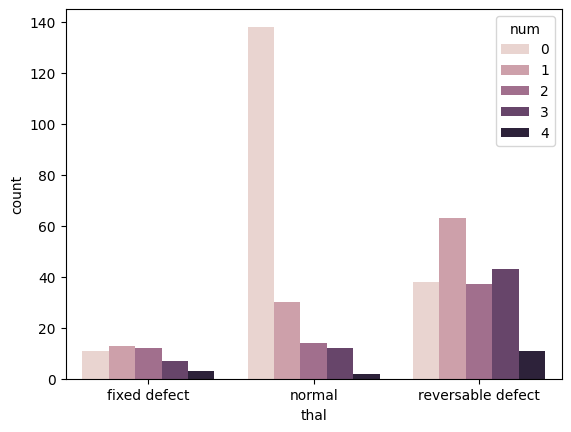

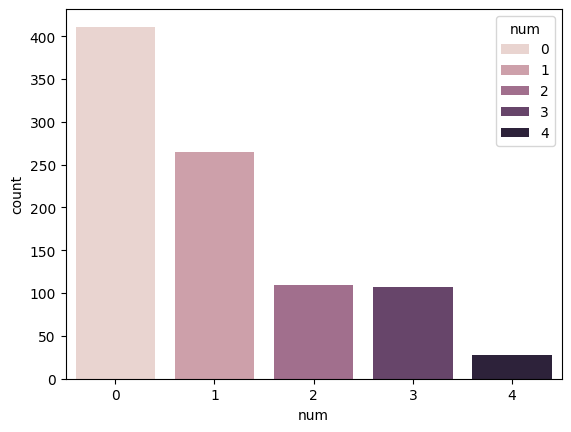

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in categorical:
  sns.countplot(data=df, x=feature, hue='num')
  plt.show()

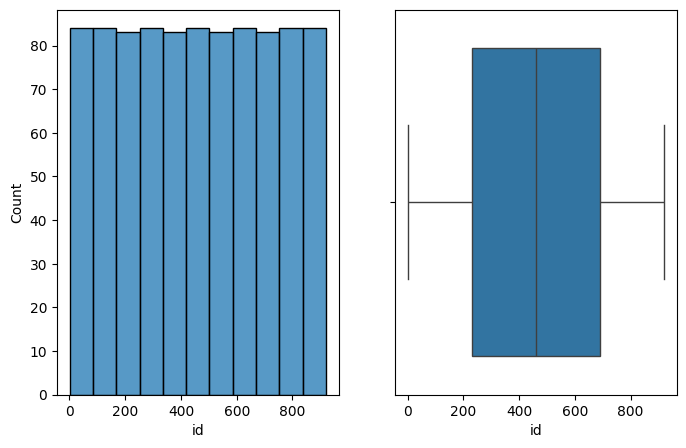

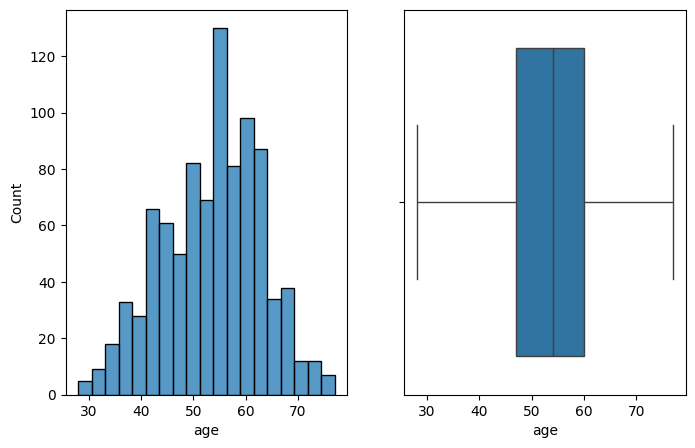

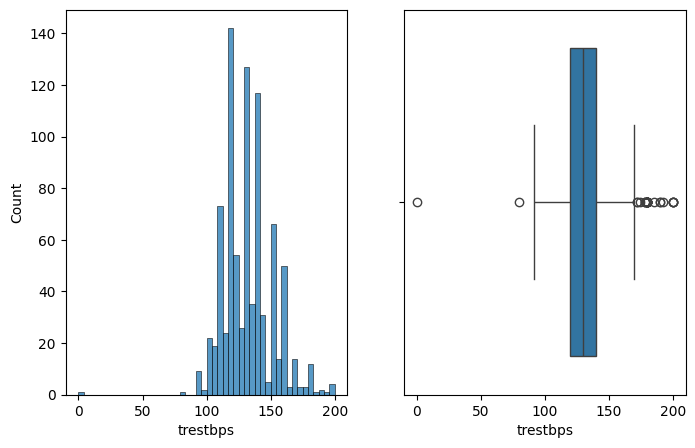

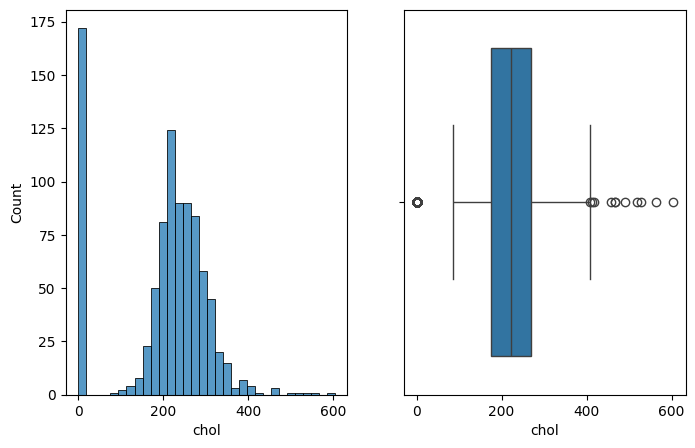

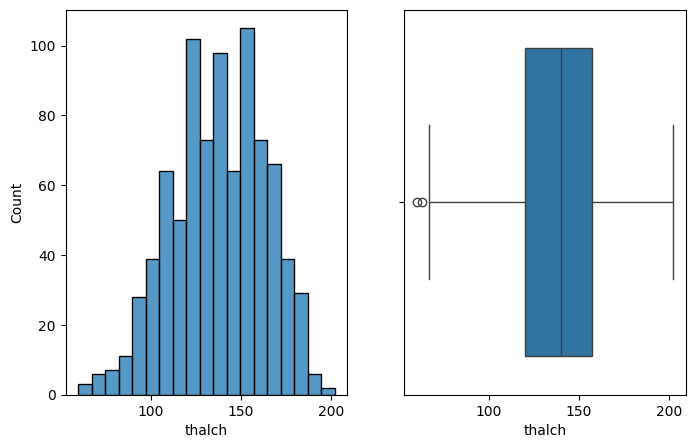

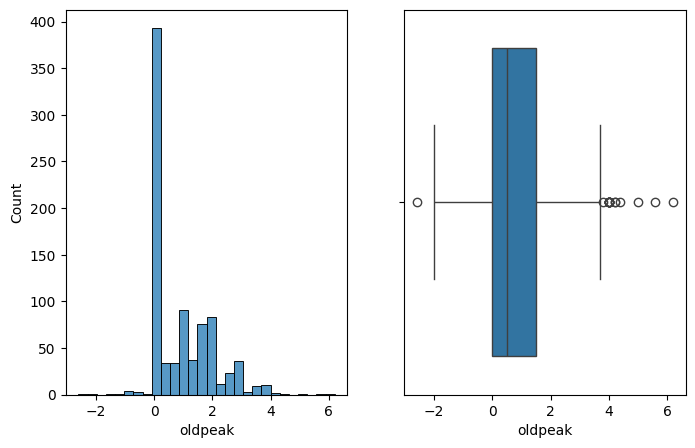

In [7]:
for feature in numeric:
  fig, axes = plt.subplots(1, 2, figsize=(8, 5))
  sns.histplot(data = df, x=feature, ax=axes[0])
  sns.boxplot(data=df, x=feature, ax=axes[1])
  plt.show()

<Axes: >

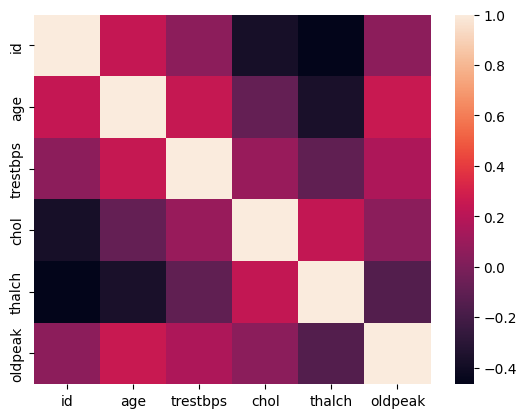

In [8]:
sns.heatmap(df[numeric].corr())

In [9]:
X = df.drop(['num'], axis=1)
y = df['num'].apply(lambda n: 0 if n == 0 else 1)

print(X.shape, y.shape)

(920, 15) (920,)


In [10]:
X = pd.get_dummies(X)
X

,id,age,trestbps,chol,thalch,oldpeak,ca,sex_Female,sex_Male,dataset_Cleveland,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1,63,145.0,233.0,150.0,2.3,0.0,False,True,True,...,False,False,True,False,True,False,False,True,False,False
1,2,67,160.0,286.0,108.0,1.5,3.0,False,True,True,...,False,False,False,True,False,True,False,False,True,False
2,3,67,120.0,229.0,129.0,2.6,2.0,False,True,True,...,False,False,False,True,False,True,False,False,False,True
3,4,37,130.0,250.0,187.0,3.5,0.0,False,True,True,...,True,False,True,False,True,False,False,False,True,False
4,5,41,130.0,204.0,172.0,1.4,0.0,True,False,True,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,127.0,333.0,154.0,0.0,NaN,True,False,False,...,False,True,True,False,False,False,False,False,False,False
916,917,62,NaN,139.0,NaN,NaN,NaN,False,True,False,...,False,True,False,False,False,False,False,False,False,False
917,918,55,122.0,223.0,100.0,0.0,NaN,False,True,False,...,False,True,True,False,False,False,False,True,False,False
918,919,58,NaN,385.0,NaN,NaN,NaN,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=imputer.feature_names_in_)
X.isna().sum()

,0
id,0
age,0
trestbps,0
chol,0
thalch,0
oldpeak,0
ca,0
sex_Female,0
sex_Male,0
dataset_Cleveland,0


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

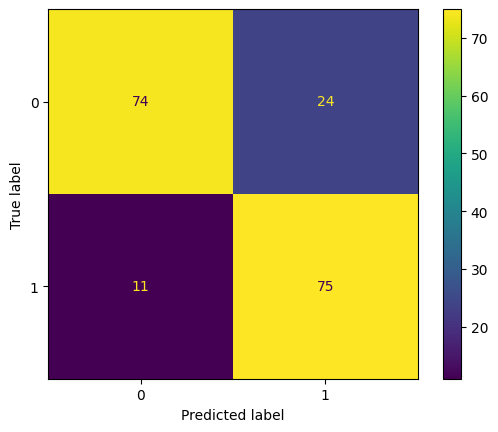

In [15]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        98
           1       0.76      0.87      0.81        86

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.81      0.81       184



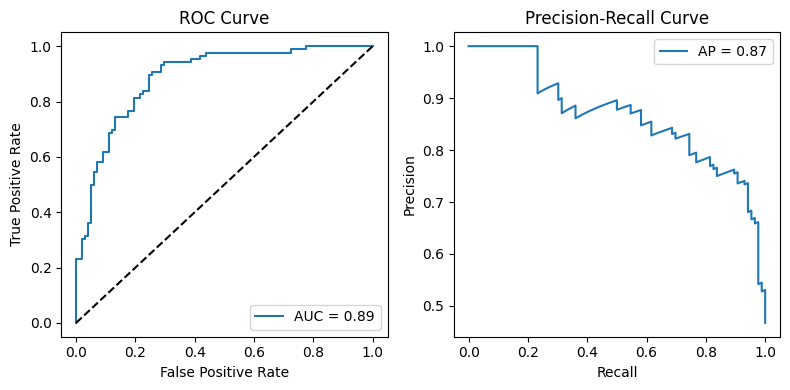

In [17]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

precision, recall, _ = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"AP = {ap:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()

plt.tight_layout()
plt.show()